SVM on Building_01 Data from T_315500_234500_NW.bin

Not Completed Yet
 
For Reference: https://elitedatascience.com/imbalanced-classes

In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm



In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
df = pd.read_csv('building_117_roof_01_door01_modified.csv', header=0, names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
#df1 = df.dropna() 
#df2 = df1.values
df.info()
print(df.shape)
#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Type == 'roof']
df_minority = df[df.Type == 'door'] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 6000, random_state=123)
#df_minority_downsampled = resample(df_minority, replace = False, n_samples = 6000, random_state=123)
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 6000, random_state=123)
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_downsampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

#display class counts 
df_downsampled.Type.value_counts()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17877 entries, (315996.748, 234680.7109, 16.31999969) to (315991.964, 234675.4639, 5.33199978)
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17877 non-null  int64  
 1   Y                  17877 non-null  int64  
 2   Z                  17877 non-null  int64  
 3   Point_Source_ID    17877 non-null  int64  
 4   Scan_Angle_Rank    17877 non-null  int64  
 5   Flightline_Edge    17877 non-null  int64  
 6   Scan_Direction     17877 non-null  int64  
 7   Number_of_Returns  17877 non-null  int64  
 8   Return_Number      17877 non-null  int64  
 9   Time               17877 non-null  float64
 10  Intensity          17877 non-null  int64  
 11  Classification     17877 non-null  int64  
 12  Type               17877 non-null  object 
dtypes: float64(1), int64(11), object(1)
memory usage: 2.6+ MB
(17877, 13)


door    6000
roof    6000
Name: Type, dtype: int64

In [ ]:
#with downsampling, and normalization
xOld = df_downsampled.drop('Type', axis = 1)
#print(x)
y = df_downsampled.Type
#print(y)
#print(x.shape,y.shape)
#print(y.shape)

scaler = preprocessing.StandardScaler().fit(xOld)
scaler.mean_
scaler.scale_
x = scaler.transform(xOld)

x.mean(axis = 0)
x.std(axis=0)

#print(x.shape)

array([1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.])

In [ ]:
'''
#df = pd.read_csv('building_01_small.csv', names = ['X','Y','Z','R','G','B','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification'])
df = pd.read_csv('building_01_small.csv')
df1 = df.dropna() 
df2 = df1.values
print(df2)
'''

"\n#df = pd.read_csv('building_01_small.csv', names = ['X','Y','Z','R','G','B','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification'])\ndf = pd.read_csv('building_01_small.csv')\ndf1 = df.dropna() \ndf2 = df1.values\nprint(df2)\n"

In [ ]:
#Reading CSV File #2, Building_0000001 txt 
df_a =  pd.read_csv('building_02_roof_doors.csv',sep = ',',header = 0,names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df_a1 = df_a.dropna() 
df_a2 = df_a1.values
#print(df_a)
df_a.info()
#print(df_a['Z'])
'''
#Reading CSV File #2, Building_0000001 txt 
df_b = pd.read_csv('Buildings_000002.txt',sep = ' ')
df_b1 = df_b.dropna() 
df_b2 = df_b1.values
'''

                                     X   Y    Z  Point_Source_ID  \
315714.5031 234789.8271 17.400999    0  85  255               12   
315714.5909 234789.9209 17.347000    0  85  255               12   
315714.6980 234790.0371 17.361000    0  85  255               12   
315714.7950 234790.1421 17.344000    0  85  255               12   
315714.6060 234789.6812 17.518999    0  85  255               12   
...                                ...  ..  ...              ...   
315730.5730 234790.8389 8.092000   255   0  255               22   
315730.5540 234790.8481 7.177000   255   0  255               22   
315730.5370 234790.8491 6.142000   255   0  255               22   
315729.5880 234792.0830 7.086000   255   0  255               23   
315729.5820 234792.1299 7.624000   255   0  255               23   

                                   Scan_Angle_Rank  Flightline_Edge  \
315714.5031 234789.8271 17.400999              -20                0   
315714.5909 234789.9209 17.347000        

"\n#Reading CSV File #2, Building_0000001 txt \ndf_b = pd.read_csv('Buildings_000002.txt',sep = ' ')\ndf_b1 = df_b.dropna() \ndf_b2 = df_b1.values\n"

In [ ]:
'''
#CELL ISN'T USED
#Checking to see if everything is working 
#df.info()
#df.head(3)
classifier_count = df['Classification'].value_counts().to_frame()
classifier_count.head(2)

#df_a.info()
#df_a.head(3)
'''

"\n#CELL ISN'T USED\n#Checking to see if everything is working \n#df.info()\n#df.head(3)\nclassifier_count = df['Classification'].value_counts().to_frame()\nclassifier_count.head(2)\n\n#df_a.info()\n#df_a.head(3)\n"

In [ ]:
'''
#For edited CSV 
x = df2[:, :14] 
y = df2[:, 14]
print(x.shape, y.shape)
'''

'\n#For edited CSV \nx = df2[:, :14] \ny = df2[:, 14]\nprint(x.shape, y.shape)\n'

In [ ]:
#without upsampling
#I will use all the attributes (building_000000 CSV)
#x = df2[:, :14] 
#y = df2[:, 14]

#with upsampling 
#x = df_downsampled.drop('Classification', axis = 1)
#print(x)
#y = df_downsampled.Classification
#print(y)
#print(x.shape,y.shape)

In [ ]:
#Normalizing two other data sets
#For building 000001
x1Old = df_a2[:, :12] 
y1 = df_a2[:, 12] 

scaler = preprocessing.StandardScaler().fit(x1Old)
x1 = scaler.transform(x1Old)
'''
#For building 000002
x2Old = df_b2[:, :14] 
y2 = df_b2[:, 14] 

scaler = preprocessing.StandardScaler().fit(x2Old)
x2 = scaler.transform(x2Old)
'''

'\n#For building 000002\nx2Old = df_b2[:, :14] \ny2 = df_b2[:, 14] \n\nscaler = preprocessing.StandardScaler().fit(x2Old)\nx2 = scaler.transform(x2Old)\n'

In [ ]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#print(x_train)
#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
#print(y_train)

(9000, 12) (3000, 12)


In [ ]:

#SVM - LINEAR 
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_linear = []
acc_test_svm_linear = []
#acc_test_y1_linear = []
#train
print("Train Accuracy using a Linear kernel")
for c in cVals: 
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train_linear = np.mean(yhat_svc_linear_train == y_train)
    acc_train_svm_linear.append(acc_train_linear)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_linear)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_linear_building_000001_SVM = svc_poly.predict(x1)
    acc_linear_building_000001_SVM = np.mean(yhat_linear_building_000001_SVM == y1)
    print("Linear (other building):",acc_linear_building_000001_SVM)
#print("Train Accuracy: ",acc_train_linear)


Train Accuracy using a Linear kernel
Train Accuracy(c=0.01): 1.0
Linear (other building): 0.9708950749464668
Train Accuracy(c=0.1): 1.0
Linear (other building): 0.9708950749464668
Train Accuracy(c=1): 1.0
Linear (other building): 0.9708950749464668
Train Accuracy(c=10): 1.0
Linear (other building): 0.9708950749464668
Train Accuracy(c=100): 1.0
Linear (other building): 0.9708950749464668


In [ ]:
#SVM - POLYNOMIAL
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_poly = []
acc_test_svm_poly = []
#train
print("Train Accuracy using a Poly kernel")
for c in cVals: 
    svc_poly = svm.SVC(probability = False, kernel = 'poly', C = c)
    svc_poly.fit(x_train, y_train)

    yhat_svc_poly_train = svc_poly.predict(x_train)
    acc_train_poly = np.mean(yhat_svc_poly_train == y_train)
    acc_train_svm_poly.append(acc_train_poly)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_poly)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_svc_poly_test = svc_poly.predict(x_test)
    acc_test_poly = np.mean(yhat_svc_poly_test == y_test)
    acc_test_svm_poly.append(acc_test_poly)
    print("Test Accuracy (c=",c,"): ", acc_test_poly)

    yhat_poly_building_000001_SVM = svc_poly.predict(x1)
    acc_poly_building_000001_SVM = np.mean(yhat_poly_building_000001_SVM == y1)
    print("POLY (other building):",acc_poly_building_000001_SVM)

    '''
    yhat_poly_building_000002_SVM = svc_poly.predict(x2)
    acc_poly_building_000002_SVM = np.mean(yhat_poly_building_000002_SVM == y2)
    print("POLY (other building):",acc_poly_building_000002_SVM)
    '''

#print("Train Accuracy: ",acc_train_linear)

Train Accuracy using a Poly kernel
Train Accuracy(c=0.01): 1.0
Test Accuracy (c= 0.01 ):  1.0
POLY (other building): 0.643340471092077
Train Accuracy(c=0.1): 1.0
Test Accuracy (c= 0.1 ):  1.0
POLY (other building): 0.9779014989293362
Train Accuracy(c=1): 1.0
Test Accuracy (c= 1 ):  1.0
POLY (other building): 0.9770107066381156
Train Accuracy(c=10): 1.0
Test Accuracy (c= 10 ):  1.0
POLY (other building): 0.9708950749464668
Train Accuracy(c=100): 1.0
Test Accuracy (c= 100 ):  1.0
POLY (other building): 0.9708950749464668


In [ ]:

#SVM - RBF
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_rbf = []
acc_test_svm_rbf = []
#train
print("RBF kernel")
for c in cVals: 
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)

    yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train_rbf = np.mean(yhat_svc_rbf_train == y_train)
    acc_train_svm_rbf.append(acc_train_rbf)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_rbf)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test_rbf = np.mean(yhat_svc_rbf_test == y_test)
    acc_test_svm_rbf.append(acc_test_rbf)
    print("Test Accuracy (c=",c,"): ", acc_test_rbf)

    yhat_rbf_building_000001_SVM = svc_rbf.predict(x1)
    acc_rbf_building_000001_SVM = np.mean(yhat_rbf_building_000001_SVM == y1)
    print("RBF (other building):",acc_rbf_building_000001_SVM)

    '''
    yhat_rbf_building_000002_SVM = svc_rbf.predict(x2)
    acc_rbf_building_000002_SVM = np.mean(yhat_rbf_building_000002_SVM == y2)
    print("RBF (other building):",acc_rbf_building_000002_SVM)
    '''
#print("Train Accuracy: ",acc_train_linear)


RBF kernel
Train Accuracy(c=0.01): 1.0
Test Accuracy (c= 0.01 ):  1.0
RBF (other building): 0.8221498929336188
Train Accuracy(c=0.1): 1.0
Test Accuracy (c= 0.1 ):  1.0
RBF (other building): 0.7603768736616703
Train Accuracy(c=1): 1.0
Test Accuracy (c= 1 ):  1.0
RBF (other building): 0.6860985010706638
Train Accuracy(c=10): 1.0
Test Accuracy (c= 10 ):  1.0
RBF (other building): 0.6861156316916488
Train Accuracy(c=100): 1.0
Test Accuracy (c= 100 ):  1.0
RBF (other building): 0.6861156316916488


In [ ]:

#SVM - SIGMOID
from sklearn import svm
cVals = [0.01, 0.1, 1, 10, 100]

acc_train_svm_sigmoid = []
acc_test_svm_sigmoid = []
#train
print(" SIGMOID kernel")
for c in cVals: 
    svc_sigmoid = svm.SVC(probability = False, kernel = 'sigmoid', C = c)
    svc_sigmoid.fit(x_train, y_train)

    yhat_svc_sigmoid_train = svc_sigmoid.predict(x_train)
    acc_train_sigmoid = np.mean(yhat_svc_sigmoid_train == y_train)
    acc_train_svm_sigmoid.append(acc_train_sigmoid)
    print("Train Accuracy(c=" + str(c) + "):", acc_train_sigmoid)
    #print('Train Accuracy = {0:f}'.format(acc_train_linear))

    
    yhat_svc_sigmoid_test = svc_sigmoid.predict(x_test)
    acc_test_sigmoid = np.mean(yhat_svc_sigmoid_test == y_test)
    acc_test_svm_sigmoid.append(acc_test_sigmoid)
    print("Test Accuracy (c=",c,"): ", acc_test_sigmoid)
    
#print("Train Accuracy: ",acc_train_linear)




 SIGMOID kernel
Train Accuracy(c=0.01): 0.9963333333333333
Test Accuracy (c= 0.01 ):  0.9963333333333333
Train Accuracy(c=0.1): 0.9956666666666667
Test Accuracy (c= 0.1 ):  0.9956666666666667
Train Accuracy(c=1): 0.9982222222222222
Test Accuracy (c= 1 ):  0.999
Train Accuracy(c=10): 0.9992222222222222
Test Accuracy (c= 10 ):  0.9996666666666667
Train Accuracy(c=100): 0.9996666666666667
Test Accuracy (c= 100 ):  0.9996666666666667


In [ ]:
'''
#Logistic Regression 
logreg = LogisticRegression(C=1000).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)
'''


'\n#Logistic Regression \nlogreg = LogisticRegression(C=1000).fit(x_train,y_train)\nyhat_train = logreg.predict(x_train)\nprint(np.unique(yhat_train))\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy for Train Data:",accuracy_train)\n\nyhat_test = logreg.predict(x_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy for Test Data:",accuracy_test)\n'

'\n#Logistic Regression \nlogreg = LogisticRegression(C=1000).fit(x_train,y_train)\nyhat_train = logreg.predict(x_train)\nprint(np.unique(yhat_train))\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy for Train Data:",accuracy_train)\n\nyhat_test = logreg.predict(x_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy for Test Data:",accuracy_test)\n'

In [ ]:
'''
#Logistic Regression 
logreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)
#print(yhat_train)

#finding accuracy of applying model on training data
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy on train set:",accuracy_train)

#finding accuracy of applying model on test data 
yhat_test = logreg.predict(x_test)
#print(yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test set:",accuracy_test)
'''

'\n#Logistic Regression \nlogreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization\nlogreg.fit(x_train, y_train)\nyhat_train = logreg.predict(x_train)\n#print(yhat_train)\n\n#finding accuracy of applying model on training data\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy on train set:",accuracy_train)\n\n#finding accuracy of applying model on test data \nyhat_test = logreg.predict(x_test)\n#print(yhat_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy on test set:",accuracy_test)\n'

'\n#Logistic Regression \nlogreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization\nlogreg.fit(x_train, y_train)\nyhat_train = logreg.predict(x_train)\n#print(yhat_train)\n\n#finding accuracy of applying model on training data\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy on train set:",accuracy_train)\n\n#finding accuracy of applying model on test data \nyhat_test = logreg.predict(x_test)\n#print(yhat_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy on test set:",accuracy_test)\n'

In [ ]:
'''
#SVM for other building - ALREADY INCLUDED ABOVE 
svc_poly = svm.SVC(probability = False, kernel = 'poly', C = 1)
svc_poly.fit(x_train, y_train)

yhat_poly_building_000001_SVM = svc_poly.predict(x1)
acc_poly_building_000001_SVM = np.mean(yhat_poly_building_000001_SVM == y1)
print("POLY:",acc_poly_building_000001_SVM)

svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = 1)
svc_rbf.fit(x_train, y_train)

yhat_rbf_building_000001_SVM = svc_rbf.predict(x1)
acc_rbf_building_000001_SVM = np.mean(yhat_rbf_building_000001_SVM == y1)
print("RBF:",acc_rbf_building_000001_SVM)
'''


'\n#SVM for other building - ALREADY INCLUDED ABOVE \nsvc_poly = svm.SVC(probability = False, kernel = \'poly\', C = 1)\nsvc_poly.fit(x_train, y_train)\n\nyhat_poly_building_000001_SVM = svc_poly.predict(x1)\nacc_poly_building_000001_SVM = np.mean(yhat_poly_building_000001_SVM == y1)\nprint("POLY:",acc_poly_building_000001_SVM)\n\nsvc_rbf = svm.SVC(probability = False, kernel = \'rbf\', C = 1)\nsvc_rbf.fit(x_train, y_train)\n\nyhat_rbf_building_000001_SVM = svc_rbf.predict(x1)\nacc_rbf_building_000001_SVM = np.mean(yhat_rbf_building_000001_SVM == y1)\nprint("RBF:",acc_rbf_building_000001_SVM)\n'

'\n#SVM for other building - ALREADY INCLUDED ABOVE \nsvc_poly = svm.SVC(probability = False, kernel = \'poly\', C = 1)\nsvc_poly.fit(x_train, y_train)\n\nyhat_poly_building_000001_SVM = svc_poly.predict(x1)\nacc_poly_building_000001_SVM = np.mean(yhat_poly_building_000001_SVM == y1)\nprint("POLY:",acc_poly_building_000001_SVM)\n\nsvc_rbf = svm.SVC(probability = False, kernel = \'rbf\', C = 1)\nsvc_rbf.fit(x_train, y_train)\n\nyhat_rbf_building_000001_SVM = svc_rbf.predict(x1)\nacc_rbf_building_000001_SVM = np.mean(yhat_rbf_building_000001_SVM == y1)\nprint("RBF:",acc_rbf_building_000001_SVM)\n'

In [ ]:
'''
Logistic Regression model on other building
#finding accuracy of applying model to a different building 
yhat_building_000001 = logreg.predict(x1)
print(yhat_building_000001)
accuracy_building_000001 = accuracy_score(y1, yhat_building_000001)
print("Accuracy on a different building (01):",accuracy_building_000001)
'''

'\nLogistic Regression model on other building\n#finding accuracy of applying model to a different building \nyhat_building_000001 = logreg.predict(x1)\nprint(yhat_building_000001)\naccuracy_building_000001 = accuracy_score(y1, yhat_building_000001)\nprint("Accuracy on a different building (01):",accuracy_building_000001)\n'

'\nLogistic Regression model on other building\n#finding accuracy of applying model to a different building \nyhat_building_000001 = logreg.predict(x1)\nprint(yhat_building_000001)\naccuracy_building_000001 = accuracy_score(y1, yhat_building_000001)\nprint("Accuracy on a different building (01):",accuracy_building_000001)\n'

In [ ]:
'''
#Logistic Regression Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label=2)
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)
'''

'\n#Logistic Regression Model Parameters (w/o Regularization)\nw = logreg.coef_ \nintercept = logreg.intercept_\n\nprecision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average=\'binary\',pos_label=2)\nprint("Coefficient:",w)\nprint("Intercept:",intercept)\nprint("Precision:",precision)\nprint("Recall:",recall)\nprint("Fscore:",fscore)\n'

'\n#Logistic Regression Model Parameters (w/o Regularization)\nw = logreg.coef_ \nintercept = logreg.intercept_\n\nprecision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average=\'binary\',pos_label=2)\nprint("Coefficient:",w)\nprint("Intercept:",intercept)\nprint("Precision:",precision)\nprint("Recall:",recall)\nprint("Fscore:",fscore)\n'

In [ ]:
'''
#confusion matrices for LOGISTIC REGRESSION
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
'''

'\n#confusion matrices for LOGISTIC REGRESSION\nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, x_test, y_test,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()\n'

'\n#confusion matrices for LOGISTIC REGRESSION\nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, x_test, y_test,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()\n'

In [ ]:
'''
#Confusion Matrix for SVM Poly for regular set of Data 

np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


#Confusion Matrix for SVM Poly for other building1 set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x2, y2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
'''

'\n#Confusion Matrix for SVM Poly for regular set of Data \n\nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = svm.SVC(probability = False, kernel = \'poly\', C = 1).fit(x_train, y_train)\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, x_test, y_test,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()\n\n\n#Confusion Matrix for SVM Poly for other building1 set of Data \nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = svm.SVC(probability = False, kernel = \'poly\', C = 1).fit(x_train, y_train)\n\n# Plot non-no

'\n#Confusion Matrix for SVM Poly for regular set of Data \n\nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = svm.SVC(probability = False, kernel = \'poly\', C = 1).fit(x_train, y_train)\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, x_test, y_test,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()\n\n\n#Confusion Matrix for SVM Poly for other building1 set of Data \nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = svm.SVC(probability = False, kernel = \'poly\', C = 1).fit(x_train, y_train)\n\n# Plot non-no

Confusion matrix, without normalization
[[  739     0]
 [    0 57636]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


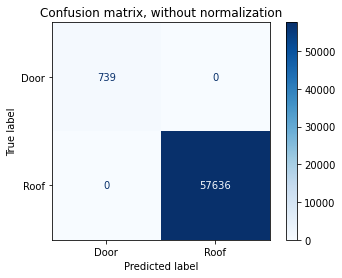

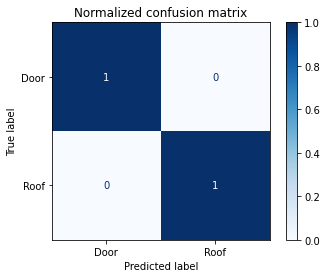

'\n#Confusion Matrix for SVM Poly for other building1 set of Data \nnp.set_printoptions(precision=2)\nclass_names = [\'2\',\'4\']\nclassifier = svm.SVC(probability = False, kernel = \'poly\', C = 1).fit(x_train, y_train)\n\n# Plot non-normalized confusion matrix\ntitles_options = [("Confusion matrix, without normalization", None),\n                  ("Normalized confusion matrix", \'true\')]\nfor title, normalize in titles_options:\n    disp = plot_confusion_matrix(classifier, x2, y2,\n                                 display_labels=class_names,\n                                 cmap=plt.cm.Blues,\n                                 normalize=normalize)\n    disp.ax_.set_title(title)\n\n    print(title)\n    print(disp.confusion_matrix)\n\nplt.show()\n'

In [ ]:
#Confusion Matrix for SVM Poly for train set of Data 

np.set_printoptions(precision=2)
class_names = ['Door','Roof']
classifier = svm.SVC(probability = False, kernel = 'linear', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

'''
#Confusion Matrix for SVM Poly for other building1 set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x2, y2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()
'''

In [ ]:
#Confusion Matrix for SVM Poly for train set of Data 

np.set_printoptions(precision=2)
class_names = ['Roof','Door']
classifier = svm.SVC(probability = False, kernel = 'sigmoid', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[140253  62839]
 [  9850  19512]]
Normalized confusion matrix
[[0.69 0.31]
 [0.34 0.66]]


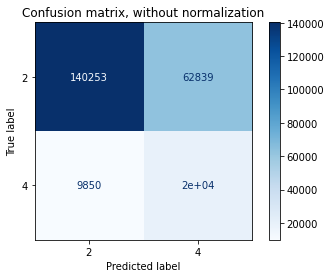

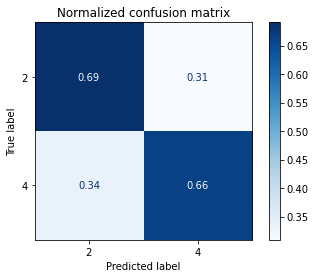

Confusion matrix, without normalization
[[138369  64723]
 [ 10584  18778]]
Normalized confusion matrix
[[0.68 0.32]
 [0.36 0.64]]


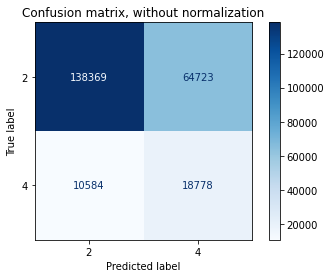

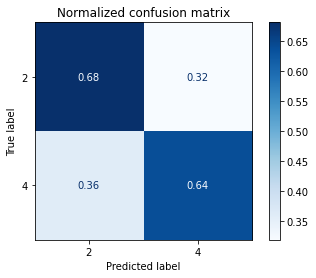

In [ ]:

#Confusion Matrix for SVM Poly for other building2 set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x2, y2,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


Confusion matrix, without normalization
[[47452  8930]
 [ 5530 11134]]
Normalized confusion matrix
[[0.84 0.16]
 [0.33 0.67]]


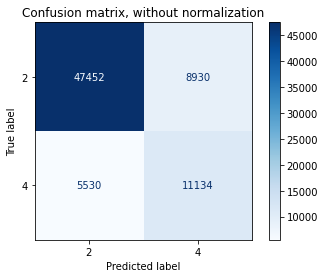

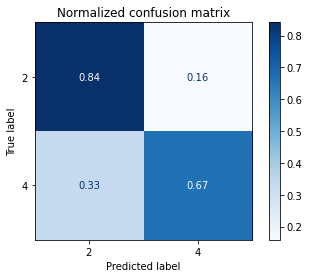

Confusion matrix, without normalization
[[47530  8852]
 [ 6842  9822]]
Normalized confusion matrix
[[0.84 0.16]
 [0.41 0.59]]


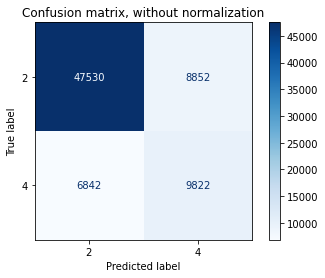

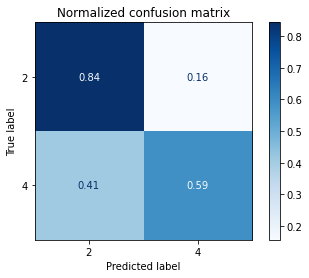

In [ ]:

#Confusion Matrix for SVM Poly for other building1 set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = svm.SVC(probability = False, kernel = 'poly', C = 1).fit(x_train, y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


Confusion matrix, without normalization
[[43724 12658]
 [ 4005 12659]]
Normalized confusion matrix
[[0.78 0.22]
 [0.24 0.76]]


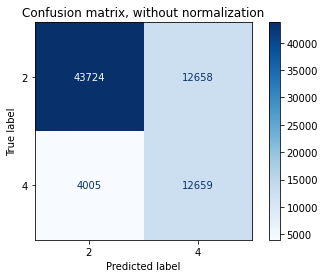

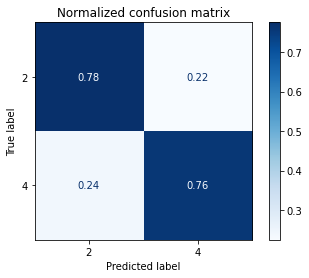

Confusion matrix, without normalization
[[43186 13196]
 [ 4111 12553]]
Normalized confusion matrix
[[0.77 0.23]
 [0.25 0.75]]


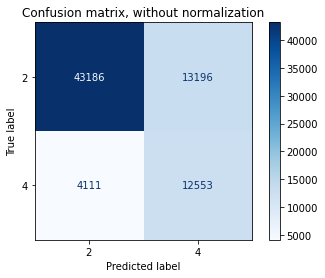

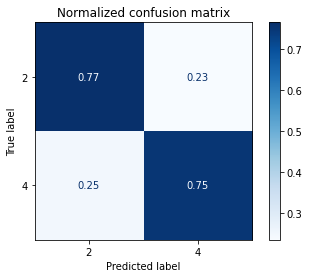

In [ ]:

#Confusion Matrix for RBF for other test set of Data 
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier =  svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = 1).fit(x_train, y_train)


# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>